## Intro to transit light curves with harmonica

In this tutorial we will go through how to generate transit light curves with harmonica. Start by importing harmonica and defining the orbit, limb darkening, transmission string, and the times at which the light curve will be computed.

In [1]:
import numpy as np
from harmonica import HarmonicaTransit


# Orbit.
t0 = 5.
period = 10.
a = 7.
inc = 88. * np.pi / 180.

# Limb darkening coefficients.
u = np.array([0.40, 0.29])

# Transmission string coefficients.
r = np.array([0.1, -0.005, 0.005, -0.005, 0.005])

# Model evaluation times.
times = np.linspace(4.4, 5.6, 1000)

Now we simply instantiate the HarmonicaTransit class and set the system configuration.

In [2]:
ht = HarmonicaTransit(times)
ht.set_orbit(t0=t0, period=period, a=a, inc=inc)
ht.set_stellar_limb_darkening(u, limb_dark_law='quadratic')
ht.set_planet_transmission_string(r)

And now a transit light curve can be generated.

In [3]:
fluxes = ht.get_transit_light_curve()

Let us take a look at this light curve.

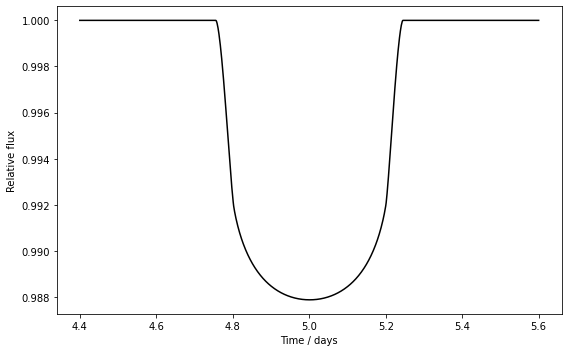

In [4]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(1, figsize=(8, 5))
ax1.plot(times, fluxes, c='#000000')
ax1.set_xlabel('Time / days')
ax1.set_ylabel('Relative flux')
plt.tight_layout()
plt.show()